# DETERMINE SPENDER TYPES PER REGION

## CONTENTS:
1. Import libraries and data set.
2. Mapping of states to regions.
3. Export file with mapping to be used in visualizations.

### 1. Import libraries and data set.

In [ ]:
# Import libraries and file. Check file. 
# Mapping of states to regions.
# Export file with mapping to be used in visualizations.

In [1]:
# Import libraries, the last three for data visualizations
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Instacart Basket Analysis\02 Data\Prepared data'

In [3]:
# import ords_prods_custs. I call it opc to have a short name.
opc = pd.read_pickle(os.path.join(path, 'ords_prods_custs.pkl'))

In [4]:
opc.shape

(32641268, 31)

In [6]:
# Check what values to expect.
opc['spending_flag'].unique()

array(['High spender', 'Low spender'], dtype=object)

### 2. Mapping of State to Regions

In [8]:
# Divison into regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 
           'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
         'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
         'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 
         'Louisiana']

# Create a dictionary to map each state to a region
region_map = {state: 'Northeast' for state in northeast}
region_map.update({state: 'Midwest' for state in midwest})
region_map.update({state: 'South' for state in south})

# Apply the mapping and assign 'West' if the state is not in the map
opc['region'] = opc['state'].map(region_map).fillna('West')

In [10]:
opc.head(2) # Check if region has been added

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,validation,product_id,add_to_cart_order,reordered,...,avg_price,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,prior,196.0,1.0,0.0,...,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,prior,14084.0,2.0,0.0,...,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South


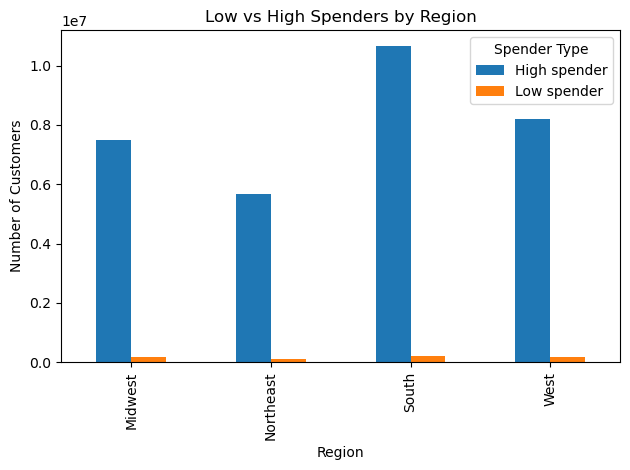

In [11]:
# Crosstab: counts of spender types per region
ct = pd.crosstab(opc['region'], opc['spending_flag'])

# Plot as grouped bar chart
ct.plot(kind='bar')
plt.title('Low vs High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spender Type')
plt.tight_layout()
plt.show()

In [12]:
# Group user id and unique order id since each row is not an order in the df
order_counts = opc.groupby('user_id')['order_id'].nunique()

In [13]:
# Identifies users with less than 5 orders
low_order_users = order_counts[order_counts < 5].index

In [14]:
# Create an exclusion flag in original opc
opc['Exclude'] = opc['user_id'].isin(low_order_users)

In [15]:
# Filter out excluded users from original opc file
filtered_opc = opc[~opc['Exclude']]

In [16]:
filtered_opc.shape

(31929979, 33)

### 3. Export file (with mapping to be used in visualizations)

In [17]:
# Export data to .pickle 
filtered_opc.to_pickle(os.path.join(path, 'ord-prod-cust_filtered.pkl'))